In [1]:
import pandas as pd
import pickle


In [2]:
%%time
may = pd.read_csv('../data/may.csv')
may.head()

Wall time: 17.8 s


,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-05-01 00:01:41.247000,36.136822,-86.799877,PoweredLIRL1,Powered,93.0,scooter,0.0,Bird
1,2019-05-01 00:01:41.247000,36.191252,-86.772945,PoweredXWRWC,Powered,35.0,scooter,0.0,Bird
2,2019-05-01 00:01:41.247000,36.144752,-86.806293,PoweredMEJEH,Powered,90.0,scooter,0.0,Bird
3,2019-05-01 00:01:41.247000,36.162056,-86.774688,Powered1A7TC,Powered,88.0,scooter,0.0,Bird
4,2019-05-01 00:01:41.247000,36.150973,-86.783109,Powered2TYEF,Powered,98.0,scooter,0.0,Bird


In [3]:
may.info() ##20292503 rows, 9 columns, note pubdatetime is an object and needs to be changed to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20292503 entries, 0 to 20292502
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   pubdatetime  object 
 1   latitude     float64
 2   longitude    float64
 3   sumdid       object 
 4   sumdtype     object 
 5   chargelevel  float64
 6   sumdgroup    object 
 7   costpermin   float64
 8   companyname  object 
dtypes: float64(4), object(5)
memory usage: 1.4+ GB


In [4]:
may.isnull().sum()##CHARGE LEVEL COLUMN HAS 283 NULLS

pubdatetime      0
latitude         0
longitude        0
sumdid           0
sumdtype         0
chargelevel    283
sumdgroup        0
costpermin       0
companyname      0
dtype: int64

In [5]:
may.describe()

,latitude,longitude,chargelevel,costpermin
count,2.029250e+07,2.029250e+07,2.029222e+07,2.029250e+07
mean,3.614048e+01,-8.675247e+01,6.592029e+01,6.126411e-02
std,6.192558e-01,1.486085e+00,3.041781e+01,7.523213e-02
min,0.000000e+00,-8.728604e+01,0.000000e+00,0.000000e+00
25%,3.614305e+01,-8.679270e+01,4.700000e+01,0.000000e+00
50%,3.615410e+01,-8.678090e+01,7.200000e+01,0.000000e+00
75%,3.616320e+01,-8.677171e+01,9.300000e+01,1.500000e-01
max,3.661670e+01,0.000000e+00,1.000000e+02,2.300000e-01


In [6]:
may.companyname.unique()

array(['Bird', 'Lyft', 'Gotcha', 'Lime', 'Spin', 'Jump', 'Bolt'],
      dtype=object)

In [7]:
company_dict = {'Bird':'Bi', 'Lyft': 'Ly', 'Gotcha': 'G', 'Lime': 'Li', 'Spin': 'S', 'Jump': 'J', 'Bolt': 'Bo'}

In [8]:
may.companyname = may.companyname.replace(company_dict)##replaced company name with 2 letter name dictionary

In [9]:
may.pubdatetime = pd.to_datetime(may.pubdatetime)##CHANGES PUBDATETIME COLUMN FROM OBJECT TO DATE TIME
may.head(2)


,pubdatetime,latitude,longitude,sumdid,sumdtype,chargelevel,sumdgroup,costpermin,companyname
0,2019-05-01 00:01:41.247,36.136822,-86.799877,PoweredLIRL1,Powered,93.0,scooter,0.0,Bi
1,2019-05-01 00:01:41.247,36.191252,-86.772945,PoweredXWRWC,Powered,35.0,scooter,0.0,Bi


In [10]:
may.sumdgroup.unique() ##produces all the unique values in the sumdgroup column


array(['scooter', 'Scooter', 'bicycle'], dtype=object)

In [11]:
may.sumdtype.unique() ##produces all the unique values in the sumdtype column

array(['Powered', 'Standard'], dtype=object)

In [12]:
may_scooters = may.loc[may.sumdgroup.isin(['scooter', 'Scooter'])] ##FILTERS DATAFRAME TO ONLY SHOW ROWS WHERE SUMDGROUP = SCOOTERS

In [13]:
##may_scooters.unique()

In [14]:
may_scooters.companyname.value_counts() ##gives the count of scooters by company

Li    7111655
Bi    4334006
Ly    3112581
J     2984630
S     1301001
G      915314
Bo     524395
Name: companyname, dtype: int64

In [15]:
may_scooters = may_scooters[['pubdatetime', 'latitude', 'longitude', 'sumdid', 'chargelevel', 'companyname']]

In [16]:
may_scooters = may.drop(columns=['chargelevel', 'costpermin']) ##drops columns chargelevel and cosstpermin from dataframe

In [17]:
may_scooters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20292503 entries, 0 to 20292502
Data columns (total 7 columns):
 #   Column       Dtype         
---  ------       -----         
 0   pubdatetime  datetime64[ns]
 1   latitude     float64       
 2   longitude    float64       
 3   sumdid       object        
 4   sumdtype     object        
 5   sumdgroup    object        
 6   companyname  object        
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 1.1+ GB


In [18]:
may_scooters.to_pickle("../data/may.pkl")

In [19]:
%%time
may_test = pd.read_pickle("../data/may.pkl")

Wall time: 4.31 s


In [20]:
may_scooters.sumdid.unique()

array(['PoweredLIRL1', 'PoweredXWRWC', 'PoweredMEJEH', ...,
       'PoweredS26HB', 'PoweredWVFVTYLWIVLI7', 'Powered6Y1U7'],
      dtype=object)

In [21]:
may_scooters.sumdid.nunique() ##count the number of unique sumdid

8304

In [22]:
print(may_scooters['sumdid'].value_counts()) ##the count of each of the distinct values of a specific column
##https://datascienceparichay.com/article/pandas-count-of-unique-values-in-each-column/

StandardNW5HJFO4R32LY    8921
PoweredIE7H5RIN474PE     8921
PoweredUK65LOU3K5N7G     8748
PoweredIOHG2G3XKATUL     8576
PoweredJCKMQCAL2SSNJ     8521
                         ... 
Powered1PKP7                1
PoweredN4YI2A7RXZQLY        1
Powered3361332              1
Powered523737               1
PoweredCI6VKIK2KOFMC        1
Name: sumdid, Length: 8304, dtype: int64


In [23]:
##7 SCOOTER COMPANIES, 8304 SCOOTERS, 

In [38]:
may_group=may_scooters.groupby(['companyname'])['sumdid'].nunique()

In [39]:
may_group

companyname
Bi    3064
Bo     346
G      223
J      976
Li    1632
Ly    1376
S      687
Name: sumdid, dtype: int64

<AxesSubplot:>

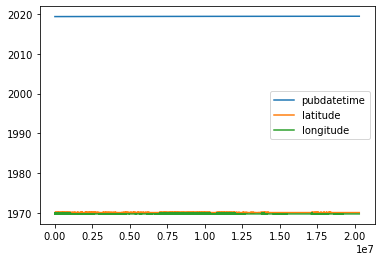

In [36]:
may_scooters.plot()

In [41]:

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline      

In [ ]:
#set the seaborn theme, style, color palette
sns.set(style="ticks", color_codes=True)

#make a correlation plot that looks at each variables relationship with every other variable
#and plots the distribution of each variable along the diagonal
sns.pairplot(may_scooters);